# Problem Statement : (Multi-class Classification)

## Create a Neural Network model to predict whether a given image belongs to either 
## Rock, Paper or Scissors category

## Importing the required libraries

In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
print(os.listdir("../input"))

['rock-paper-scissors-dataset']


In [4]:
print(os.listdir('../input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/'))

['validation', 'test', 'train']


## Paths for Train & Test directories

In [5]:
train_dir = '../input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/train/'
test_dir = '../input/rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/test/'

## Generating extra data from the existing data by using Data Augmentation

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                  validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(150,150),
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        subset='validation')

Found 2016 images belonging to 3 classes.
Found 504 images belonging to 3 classes.


## Model Building

In [8]:
model = models.Sequential([
                           layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                           layers.Conv2D(64, (3,3), activation='relu', padding='same'),
                           layers.MaxPooling2D((2,2)),

                           layers.Conv2D(64, (3,3), activation='relu', padding='same'),
                           layers.Conv2D(128, (3,3), activation='relu', padding='same'),
                           layers.MaxPooling2D((2,2)),

                           layers.Conv2D(128, (3,3), activation='relu', padding='same'),
                           layers.MaxPooling2D((2,2)),

                           layers.Dropout((0.3)),
                           layers.Flatten(),

                           layers.Dense(512, activation='relu'),
                           layers.Dense(3, activation='softmax')


])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       1

In [10]:
model.compile(tf.keras.optimizers.Adam(learning_rate=2e-5),
              tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

## Training

In [12]:
history = model.fit(train_generator,
                             steps_per_epoch=126,
                             epochs=20,
                             validation_data=validation_generator,
                            validation_steps=32,
                           callbacks=[callback])

model.save('rock_paper_scissor.h5')

Epoch 1/20
126/126 [==============================] - 43s 299ms/step - loss: 1.1042 - accuracy: 0.3355 - val_loss: 1.0922 - val_accuracy: 0.3512
Epoch 2/20
126/126 [==============================] - 27s 210ms/step - loss: 1.0542 - accuracy: 0.4641 - val_loss: 0.9433 - val_accuracy: 0.6032
Epoch 3/20
126/126 [==============================] - 26s 209ms/step - loss: 0.8935 - accuracy: 0.5719 - val_loss: 0.8618 - val_accuracy: 0.5556
Epoch 4/20
126/126 [==============================] - 26s 207ms/step - loss: 0.7024 - accuracy: 0.6995 - val_loss: 0.7564 - val_accuracy: 0.6845
Epoch 5/20
126/126 [==============================] - 26s 209ms/step - loss: 0.6013 - accuracy: 0.7519 - val_loss: 0.7226 - val_accuracy: 0.6528
Epoch 6/20
126/126 [==============================] - 26s 208ms/step - loss: 0.4859 - accuracy: 0.8373 - val_loss: 0.7001 - val_accuracy: 0.7262
Epoch 7/20
126/126 [==============================] - 26s 207ms/step - loss: 0.4045 - accuracy: 0.8615 - val_loss: 0.5947 - val_ac

In [13]:
history.history

{'loss': [1.0950727462768555,
  1.0158456563949585,
  0.8357805609703064,
  0.6719156503677368,
  0.5547009706497192,
  0.449038028717041,
  0.3758912980556488,
  0.3492066562175751,
  0.3057155907154083,
  0.30159440636634827,
  0.24081164598464966,
  0.24415351450443268,
  0.2135663777589798,
  0.1942499279975891,
  0.1877996325492859,
  0.1617664247751236,
  0.16629764437675476,
  0.14928553998470306,
  0.16686856746673584,
  0.1395723968744278],
 'accuracy': [0.3586309552192688,
  0.5183531641960144,
  0.620039701461792,
  0.7167658805847168,
  0.7822420597076416,
  0.8422619104385376,
  0.877480149269104,
  0.8839285969734192,
  0.8958333134651184,
  0.9042658805847168,
  0.9226190447807312,
  0.918154776096344,
  0.9340277910232544,
  0.9389880895614624,
  0.9459325671195984,
  0.9528769850730896,
  0.94692462682724,
  0.951884925365448,
  0.9528769850730896,
  0.9538690447807312],
 'val_loss': [1.092221736907959,
  0.943283200263977,
  0.8618345856666565,
  0.756372332572937,
  

## Results

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

In [15]:
print(f'Training Accuracy : {sum(acc)/len(acc)}')
print(f'Training Loss : {sum(loss)/len(loss)}')
print(f'\n Validation Accuracy : {sum(val_acc)/len(val_acc)}')
print(f'Validation Loss : {sum(val_loss)/len(val_loss)}')

Training Accuracy : 0.8408978223800659
Training Loss : 0.390956661850214

 Validation Accuracy : 0.736805559694767
Validation Loss : 0.6453097730875015


In [16]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size=16,
                                                    class_mode='categorical',
)

Found 372 images belonging to 3 classes.


In [17]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss : {test_loss} \n Test Accuracy : {test_acc}")

24/24 [==============================] - 4s 155ms/step - loss: 0.1257 - accuracy: 0.9570
Test Loss : 0.12571489810943604 
 Test Accuracy : 0.9569892287254333


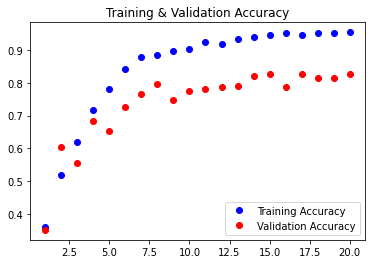

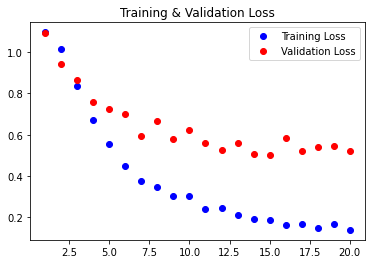

In [18]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'ro', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()